In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file = 'data/20240122/45d2cms3cm.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' pitch'])
plt.plot(df[' roll'])
plt.plot(df[' yaw'])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Attitude')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' motor1', ' motor2',
       ' motor3', ' motor4', ' otX', ' otY', ' otZ', ' yaw', ' laserFront'],
      dtype='object')


KeyError: ' pitch'

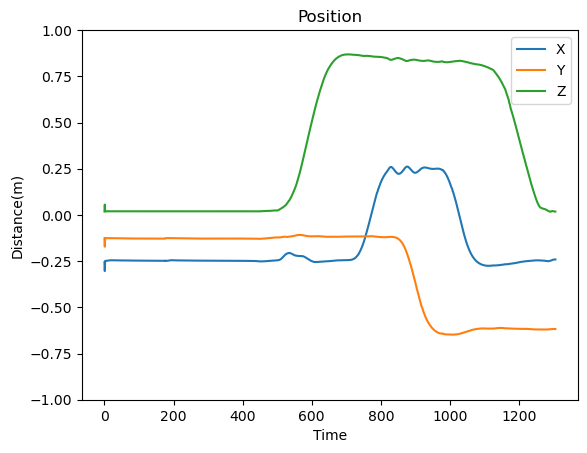

In [ ]:
plt.plot(df[' stateX'],label='X')
plt.plot(df[' stateY'],label='Y')
plt.plot(df[' stateZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(-1,1)
plt.title('Position')
plt.show()

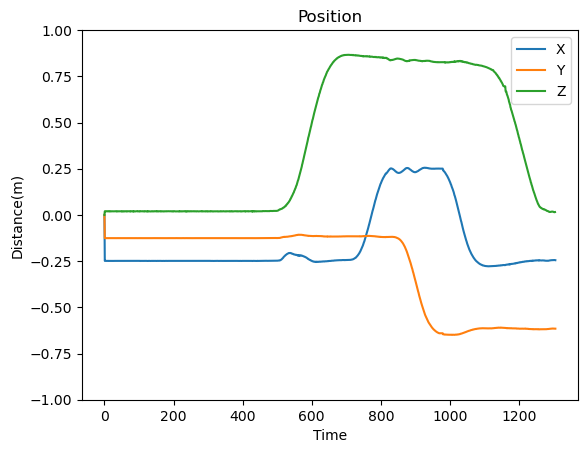

In [108]:
plt.plot(df[' otX'],label='X')
plt.plot(df[' otY'],label='Y')
plt.plot(df[' otZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.title('Position')
plt.show()

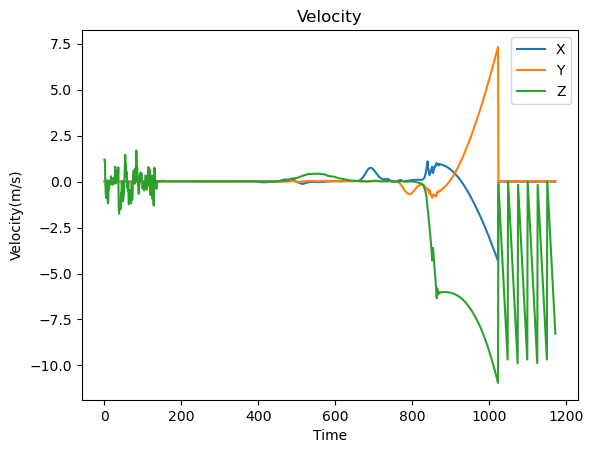

In [ ]:
plt.plot(df[' stateVX'],label='X')
plt.plot(df[' stateVY'],label='Y')
plt.plot(df[' stateVZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.ylim(0,5)
plt.title('Velocity')
plt.show()

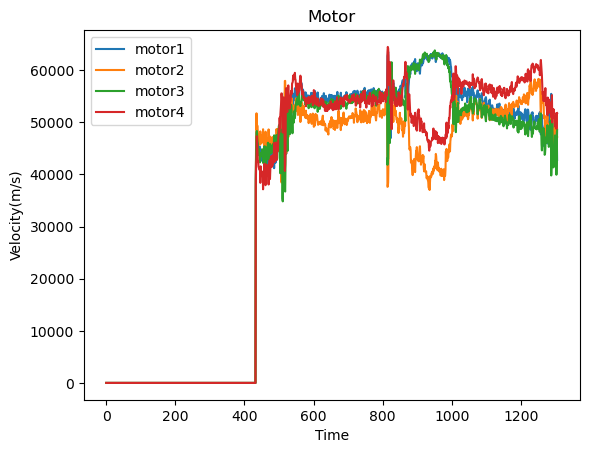

In [ ]:
plt.plot(df[' motor1'],label='motor1')
plt.plot(df[' motor2'],label='motor2')
plt.plot(df[' motor3'],label='motor3')
plt.plot(df[' motor4'],label='motor4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Motor')
plt.show()

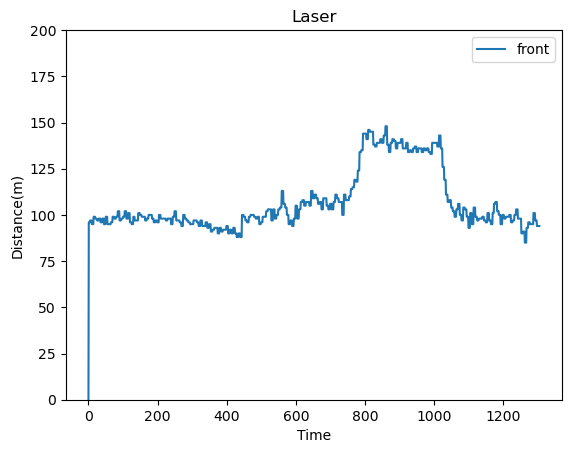

In [ ]:

# 绘制图表
plt.plot(df[' laserFront'],label='front')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(0, 200)
plt.title('Laser')
plt.show()

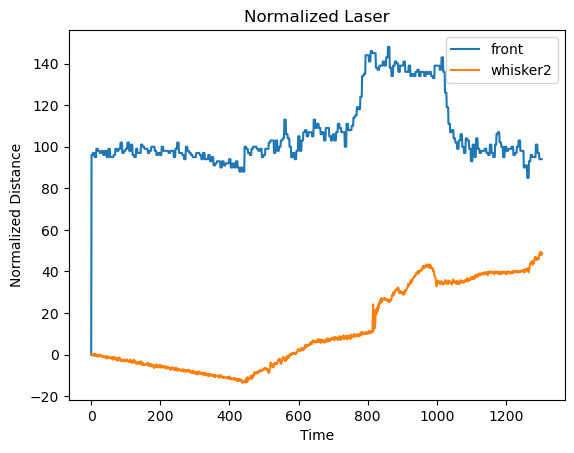

In [ ]:
scaled_whisker2 = df[' whisker2'][1:] * (df[' laserFront'][1:].max() - df[' laserFront'][1:].min()) / (df[' whisker2'][1:].max() - df[' whisker2'][1:].min())

# 绘制归一化后的数据
plt.plot(df[' laserFront'],label='front')
plt.plot((scaled_whisker2)-(scaled_whisker2[1]), label='whisker2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Normalized Distance')
plt.titl20240122e('Normalized Laser')
plt.show()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time
from sklearn.linear_model import LinearRegression

def apply_lowpass_filter(data, high_freq, fs):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        b, a = signal.butter(1, high_freq / (0.5 * fs), 'lowpass')
        zi = signal.lfilter_zi(b, a)
        filtered_data[:, i], _ = signal.lfilter(b, a, data[:, i], zi=zi*data[0, i])
    return filtered_data

def apply_highpass_filter(data, high_freq, fs):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        b, a = signal.butter(1, high_freq / (0.5 * fs), 'highpass')
        zi = signal.lfilter_zi(b, a)
        filtered_data[:, i], _ = signal.lfilter(b, a, data[:, i], zi=zi*data[0, i])
    return filtered_data

def apply_highpass_filter_1(data, high_freq, fs):
    filtered_data = np.zeros_like(data)
    b, a = signal.butter(1, high_freq / (0.5 * fs), 'highpass')
    zi = signal.lfilter_zi(b, a)
    filtered_data[:], _ = signal.lfilter(b, a, data[:], zi=zi*data[0])
    return filtered_data


def apply_bandpass_filter(data, low_freq, high_freq, fs):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        b, a = signal.butter(6, [low_freq / (0.5 * fs), high_freq / (0.5 * fs)], 'bandpass')
        zi = signal.lfilter_zi(b, a)
        filtered_data[:, i], _ = signal.lfilter(b, a, data[:, i], zi=zi*data[0, i])
    return filtered_data

def rescale_array(array1,array2):
    scaled_array=np.zeros_like(array1)
    for i in range(array1.shape[1]):
        new_min=np.min(array1[:,i])
        new_max=np.max(array1[:,i])
        min_val = np.min(array2[:,i])
        max_val = np.max(array2[:,i])
        scaled_array[:,i] = (array2[:,i] - min_val) * (new_max - new_min) / (max_val - min_val) + new_min
    return scaled_array

def rescale_array1(array1,array2):
    scaled_array=np.zeros_like(array1)
    new_min=np.min(array1)
    new_max=np.max(array1)
    min_val = np.min(array2)
    max_val = np.max(array2)
    scaled_array = (array2 - min_val) * (new_max - new_min) / (max_val - min_val) + new_min
    return scaled_array

def apply_lowpass_filter_realtime(data_point, b, a, zi):
    start_time = time.time()  # 记录开始时间
    filtered_data_point, zi = signal.lfilter(b, a, [data_point], zi=zi)
    end_time = time.time()  # 记录结束时间
    filter_time = end_time - start_time  # 计算滤波时间
    return filtered_data_point[0], zi, filter_time

[[157974.984375  128532.5       158089.4375   ]
 [157976.921875  128531.8359375 158091.375    ]
 [157976.921875  128539.3125    158087.5      ]
 ...
 [157924.625     128867.        158033.15625  ]
 [157924.625     128872.4765625 158031.203125 ]
 [157922.6875    128873.140625  158029.265625 ]]
[[-2.32830644e-10 -1.89174898e-10 -2.32830644e-10]
 [ 1.92300064e+00 -6.59092962e-01  1.92300064e+00]
 [ 1.89421894e+00  6.77138308e+00 -1.95178235e+00]
 ...
 [-5.91904715e+00  1.08659800e+01 -3.93593309e+00]
 [-5.83045630e+00  1.61389265e+01 -5.81553238e+00]
 [-7.66619204e+00  1.65564668e+01 -7.65149149e+00]]


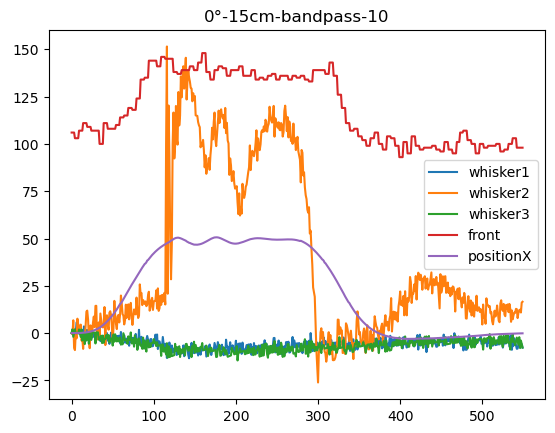

In [115]:
data = pd.read_csv('data/20240122/45d2cms3cm.csv')
pressure=data.iloc[700:1250,7:10].values
laser=data.iloc[700:1250,18].values
position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values

filtedData=apply_lowpass_filter(pressure, 10,50)
filtedData=apply_highpass_filter(pressure, 0.12,50)
print(pressure)
print(filtedData)
plt.plot(filtedData[:,0],label="whisker1")
plt.plot(filtedData[:,1],label="whisker2")
plt.plot(filtedData[:,2],label="whisker3")
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(126000, 130000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

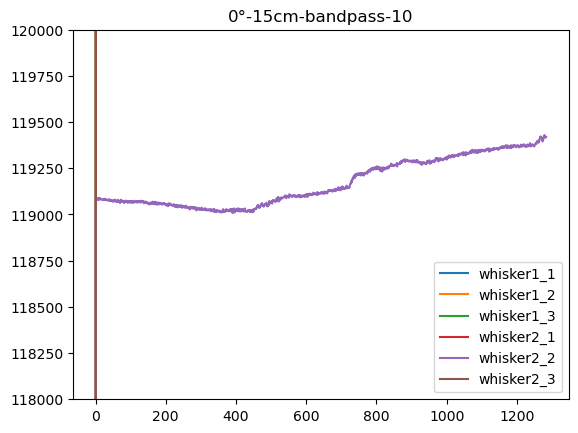

In [29]:
data = pd.read_csv('data/20240206/2024-02-06+18:40:55+optitrackstate.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(118000, 120000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

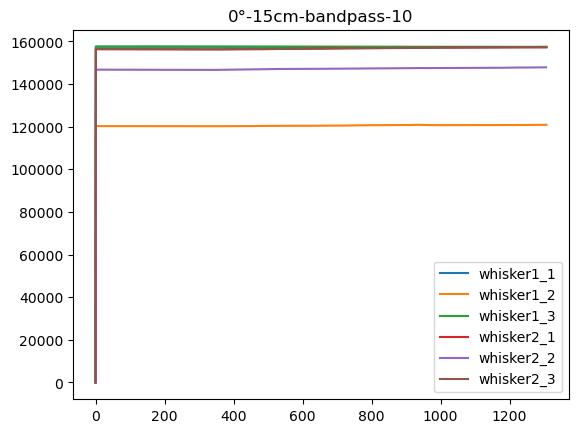

In [5]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(120000, 122500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

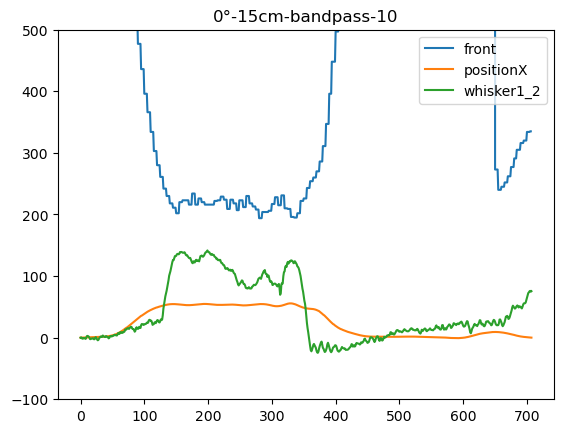

In [28]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData=apply_lowpass_filter(pressure, 5,50)
filtedData=apply_highpass_filter(filtedData, 0.1,50)
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.plot(filtedData[:,2],label="whisker1_2")
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
# plt.plot(filtedData[:,5],label="whisker2_2")
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(-100, 500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

5.7220458984375e-06


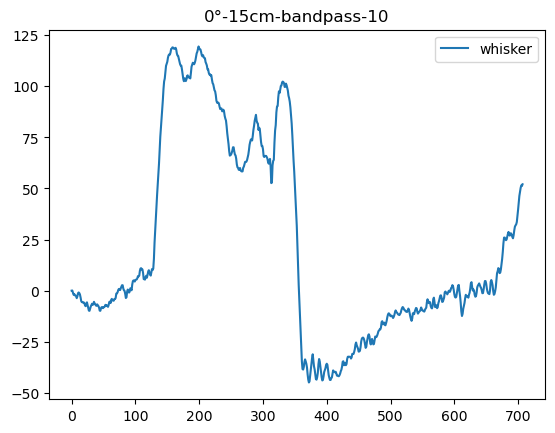

In [36]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure = data.iloc[600:, 6:13].values
laser = data.iloc[600:, -1].values
position = data.iloc[600:, 1:4].values

# 设定滤波器参数
fs = 50  # 采样率
high_freq = 3  # 截止频率为5Hz
b, a = signal.butter(1, high_freq / (0.5 * fs), 'lowpass')

# 初始化滤波器状态向量
zi= signal.lfilter_zi(b, a)*pressure[0, 2]
# 实时滤波并绘图
# plt.plot(laser, label='front')
# plt.plot(position[:, 0] * 100 - position[0, 0] * 100, label='positionX')

filtered_pressure = np.zeros_like(pressure[:, 2])
for j in range(len(pressure[:, 2])):
    filtered_pressure[j], zi, filter_time= apply_lowpass_filter_realtime(pressure[j, 2], b, a, zi)
print(filter_time)
x = np.arange(100).reshape(-1, 1)  # 构建 x 轴数据
y = filtered_pressure[:100]  # 提取前 100 个数据点的 y 轴数据
model = LinearRegression().fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_

# 使用拟合直线模型对全部数据进行预测
predicted_y = model.predict(np.arange(len(filtered_pressure)).reshape(-1, 1))

# 计算剩余数据
residuals = filtered_pressure - predicted_y
filtedData=apply_highpass_filter_1(residuals, 0.1,50)
plt.plot(filtedData , label=f"whisker")

plt.legend()
plt.title("0°-15cm-bandpass-10")
# plt.ylim(-100, 500)
plt.show()

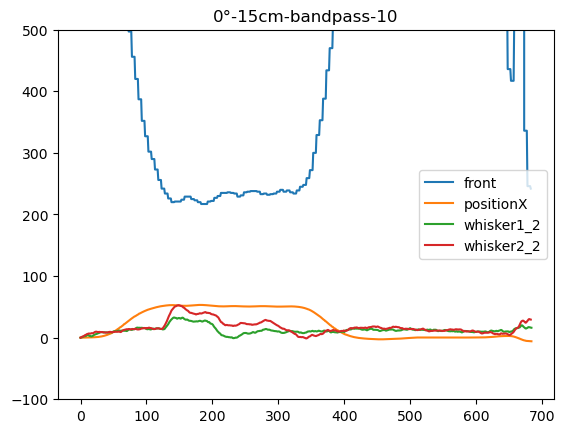

In [158]:
data = pd.read_csv('data/20240206/2024-02-06+18:40:55+optitrackstate.csv')
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData1=apply_lowpass_filter(pressure, 1,50)
filtedData1=apply_highpass_filter(filtedData1, 0.2,50)
filtedData2=apply_lowpass_filter(pressure, 1,50)
filtedData2=apply_highpass_filter(filtedData2, 0.4,50)
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.plot(filtedData2[:,2],label="whisker1_2")
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.plot(filtedData1[:,5],label="whisker2_2")
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(-100, 500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


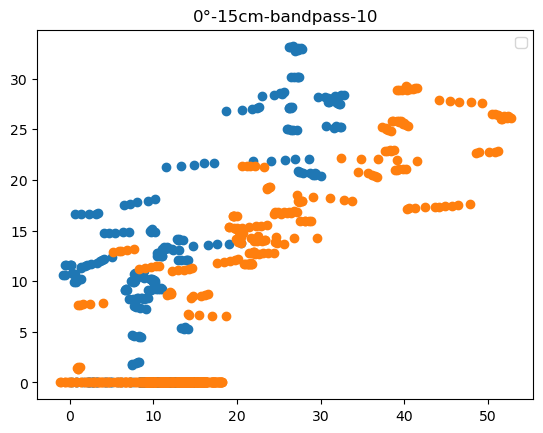

In [159]:
data = pd.read_csv('data/20240206/2024-02-06+18:40:55+optitrackstate.csv')
orientation=data.iloc[600:1200,-2].values
pressure=data.iloc[600:1200,6:13].values
laser=data.iloc[600:1200,-1].values
position=data.iloc[600:1200,1:4].values
whiskergt1=laser+25*np.tan(np.radians(orientation))
whiskergt2=laser-25*np.tan(np.radians(orientation))
whiskergt1 = np.where(whiskergt1 > 248, 0, 248 - whiskergt1)
whiskergt2 = np.where(whiskergt2 > 248, 0, 248 - whiskergt2)
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData1=apply_lowpass_filter(pressure, 1,50)
filtedData1=apply_highpass_filter(filtedData1, 0.2,50)
filtedData2=apply_lowpass_filter(pressure, 1,50)
filtedData2=apply_highpass_filter(filtedData2, 0.4,50)
# plt.plot(laser,label='front')
# plt.plot(whiskergt1,label='whiskergt1')
# plt.plot(whiskergt2,label='whiskergt2')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.scatter(filtedData2[:,2],whiskergt1)
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.scatter(filtedData1[:,5],whiskergt2)
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(210, 260)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

new_data = pd.DataFrame({
    'whisker1_1': filtedData2[:,1],
    'whisker1_2': filtedData2[:,2],
    'whisker1_3': filtedData2[:,3],
    'whisker2_1': filtedData1[:,4],
    'whisker2_2': filtedData1[:,5],
    'whisker2_3': filtedData1[:,6],
    'WhiskerGT1': whiskergt1,
    'WhiskerGT2': whiskergt2,
})
new_data.to_csv('data2.csv', index=False)

In [2]:
data = pd.read_csv('data/20240206/2024-02-06+18:44:25+optitrackstate.csv')
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2"
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData1=apply_lowpass_filter_2(pressure, 3,50)
filtedData1=apply_highpass_filter(filtedData1, 0.2,50)
filtedData2=apply_lowpass_filter(pressure, 3,50)
filtedData2=apply_highpass_filter(filtedData2, 0.4,50)
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.plot(filtedData2[:,2],label="whisker1_2")
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.plot(filtedData1[:,5],label="whisker2_2")
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(-100, 500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

ValueError: selected axis is out of range

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


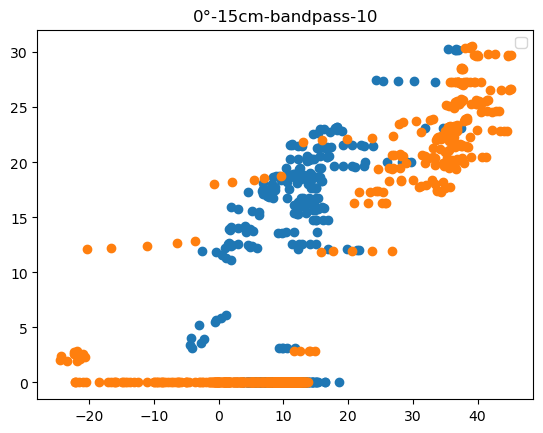

In [157]:
data = pd.read_csv('data/20240206/2024-02-06+18:44:25+optitrackstate.csv')
orientation=data.iloc[600:1200,-2].values
pressure=data.iloc[600:1200,6:13].values
laser=data.iloc[600:1200,-1].values
position=data.iloc[600:1200,1:4].values
whiskergt1=laser+25*np.tan(np.radians(orientation))
whiskergt2=laser-25*np.tan(np.radians(orientation))
whiskergt1 = np.where(whiskergt1 > 248, 0, 248 - whiskergt1)
whiskergt2 = np.where(whiskergt2 > 248, 0, 248 - whiskergt2)
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData1=apply_lowpass_filter(pressure, 3,50)
filtedData1=apply_highpass_filter(filtedData1, 0.2,50)
filtedData2=apply_lowpass_filter(pressure, 3,50)
filtedData2=apply_highpass_filter(filtedData2, 0.4,50)
# plt.plot(laser,label='front')
# plt.plot(whiskergt1,label='whiskergt1')
# plt.plot(whiskergt2,label='whiskergt2')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.scatter(filtedData2[:,2],whiskergt1)
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.scatter(filtedData1[:,5],whiskergt2)
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(210, 260)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

new_data = pd.DataFrame({
    'whisker1_1': filtedData2[:,1],
    'whisker1_2': filtedData2[:,2],
    'whisker1_3': filtedData2[:,3],
    'whisker2_1': filtedData1[:,4],
    'whisker2_2': filtedData1[:,5],
    'whisker2_3': filtedData1[:,6],
    'WhiskerGT1': whiskergt1,
    'WhiskerGT2': whiskergt2,
})
new_data.to_csv('data2.csv', index=False)

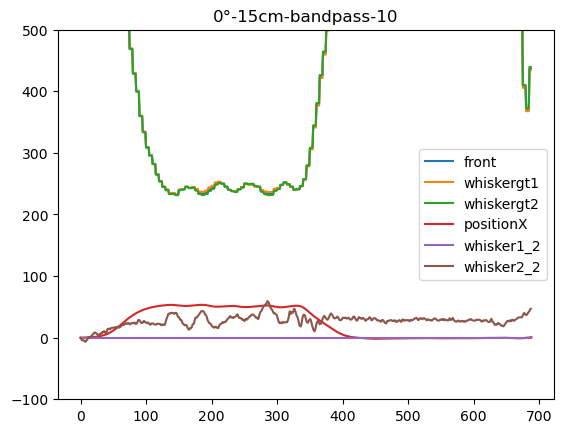

In [140]:
data = pd.read_csv('data/20240212/hit1.csv')
orientation=data.iloc[600:,-2].values
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
whiskergt1=laser+25*np.tan(np.radians(orientation))
whiskergt2=laser-25*np.tan(np.radians(orientation))
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData=apply_lowpass_filter(pressure, 3,50)
filtedData=apply_highpass_filter(filtedData, 0.2,50)
plt.plot(laser,label='front')
plt.plot(whiskergt1,label='whiskergt1')
plt.plot(whiskergt2,label='whiskergt2')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.plot(filtedData[:,2],label="whisker1_2")
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.plot(filtedData[:,5],label="whisker2_2")
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(-100, 500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


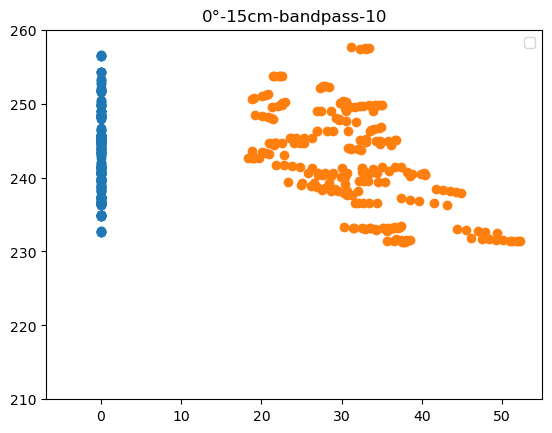

In [97]:
data = pd.read_csv('data/20240212/hit1.csv')
orientation=data.iloc[600:,-2].values
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
whiskergt1=laser+25*np.tan(np.radians(orientation))
whiskergt2=laser-25*np.tan(np.radians(orientation))
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData=apply_lowpass_filter(pressure, 1,50)
filtedData=apply_highpass_filter(filtedData, 0.2,50)
# plt.plot(laser,label='front')
# plt.plot(whiskergt1,label='whiskergt1')
# plt.plot(whiskergt2,label='whiskergt2')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.scatter(filtedData[:,2],whiskergt1)
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.scatter(filtedData[:,5],whiskergt2)
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(210, 260)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

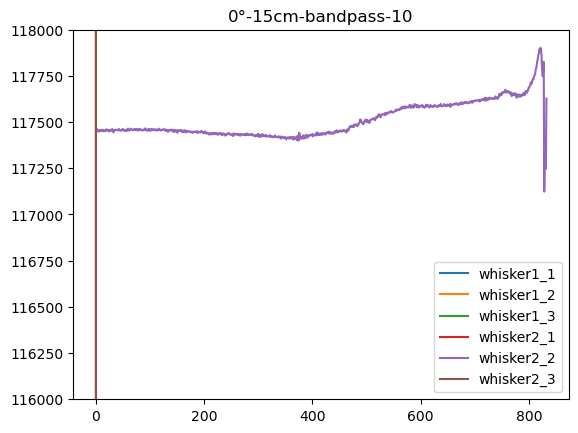

In [104]:
data = pd.read_csv('data/20240212/2024-02-12+14:28:44+optitrackstate.csv')
pressure=data.iloc[:,6:13].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,1],label="whisker1_1")
plt.plot(pressure[:,2],label="whisker1_2")
plt.plot(pressure[:,3],label="whisker1_3")
plt.plot(pressure[:,4],label="whisker2_1")
plt.plot(pressure[:,5],label="whisker2_2")
plt.plot(pressure[:,6],label="whisker2_3")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(116000, 118000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

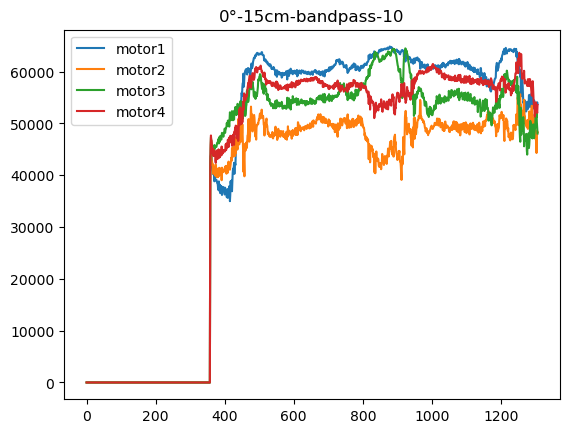

In [135]:
data = pd.read_csv('data/20240205/hit1.csv')
pressure=data.iloc[:,13:17].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,0],label="motor1")
plt.plot(pressure[:,1],label="motor2")
plt.plot(pressure[:,2],label="motor3")
plt.plot(pressure[:,3],label="motor4")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(110000, 114000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

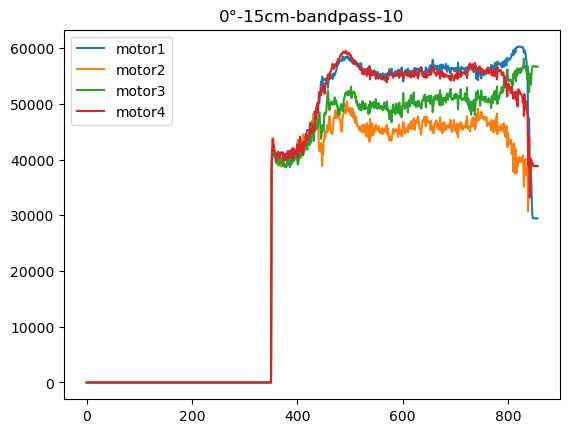

In [97]:
data = pd.read_csv('data/20240212/2024-02-12+15:59:45+optitrackstate.csv')
pressure=data.iloc[:,13:17].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,0],label="motor1")
plt.plot(pressure[:,1],label="motor2")
plt.plot(pressure[:,2],label="motor3")
plt.plot(pressure[:,3],label="motor4")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(110000, 114000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

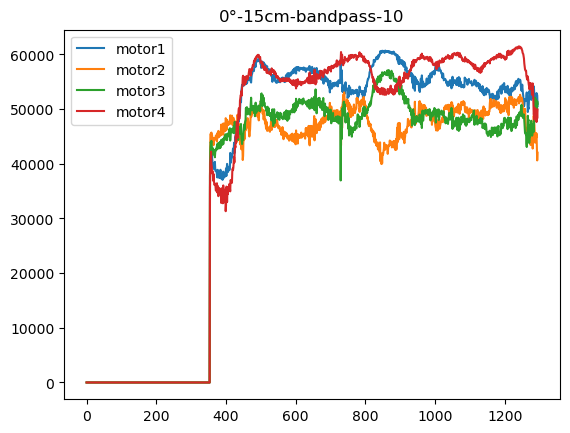

In [86]:
data = pd.read_csv('data/20240212/hit2.csv')
pressure=data.iloc[:,13:17].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,0],label="motor1")
plt.plot(pressure[:,1],label="motor2")
plt.plot(pressure[:,2],label="motor3")
plt.plot(pressure[:,3],label="motor4")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(110000, 114000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

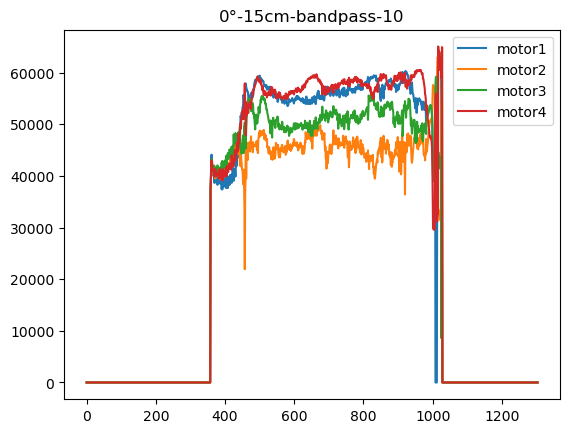

In [143]:
data = pd.read_csv('data/20240212/2024-02-12+15:42:46+optitrackstate.csv')
pressure=data.iloc[:,13:17].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,0],label="motor1")
plt.plot(pressure[:,1],label="motor2")
plt.plot(pressure[:,2],label="motor3")
plt.plot(pressure[:,3],label="motor4")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(110000, 114000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

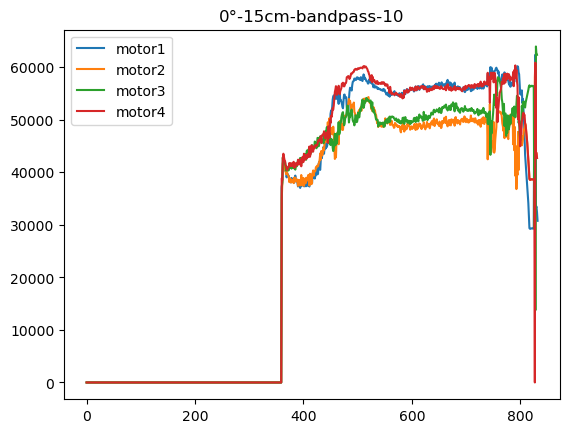

In [139]:
data = pd.read_csv('data/20240212/2024-02-12+14:28:44+optitrackstate.csv')
pressure=data.iloc[:,13:17].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
plt.plot(pressure[:,0],label="motor1")
plt.plot(pressure[:,1],label="motor2")
plt.plot(pressure[:,2],label="motor3")
plt.plot(pressure[:,3],label="motor4")
# filtedData=apply_lowpass_filter(pressure, 10,50)
# filtedData=apply_highpass_filter(pressure, 0.12,50)
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,0],label="whisker1")
# plt.plot(filtedData[:,1],label="whisker2")
# plt.plot(filtedData[:,2],label="whisker3")
# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.ylim(110000, 114000)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

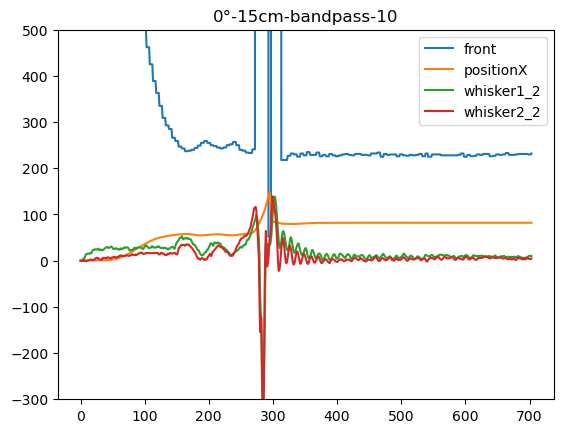

In [99]:
data = pd.read_csv('data/20240212/2024-02-12+15:50:17+optitrackstate.csv')
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData=apply_lowpass_filter(pressure, 3,50)
filtedData=apply_highpass_filter(filtedData, 0.5,50)
plt.plot(laser,label='front')
plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.plot(filtedData[:,2],label="whisker1_2")
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.plot(filtedData[:,5],label="whisker2_2")
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(-300, 500)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


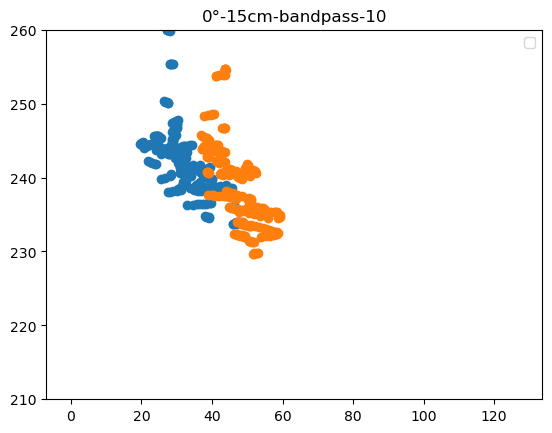

In [103]:
data = pd.read_csv('data/20240212/hit3.csv')
orientation=data.iloc[600:,-2].values
pressure=data.iloc[600:,6:13].values
laser=data.iloc[600:,-1].values
position=data.iloc[600:,1:4].values
whiskergt1=laser+25*np.tan(np.radians(orientation))
whiskergt2=laser-25*np.tan(np.radians(orientation))
# laser=data.iloc[700:1250,18].values
# position=data.iloc[700:1250,1:4].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].valus
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values
# plt.plot(pressure[:,1],label="whisker1_1")
# plt.plot(pressure[:,2],label="whisker1_2")
# plt.plot(pressure[:,3],label="whisker1_3")
# plt.plot(pressure[:,4],label="whisker2_1")
# plt.plot(pressure[:,5],label="whisker2_2")
# plt.plot(pressure[:,6],label="whisker2_3")
filtedData=apply_lowpass_filter(pressure, 1,50)
filtedData=apply_highpass_filter(filtedData, 0.5,50)
# plt.plot(laser,label='front')
# plt.plot(whiskergt1,label='whiskergt1')
# plt.plot(whiskergt2,label='whiskergt2')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
# # print(pressure)
# # print(filtedData)
# plt.plot(filtedData[:,1],label="whisker1_1")
plt.scatter(filtedData[:,2],whiskergt1)
# plt.plot(filtedData[:,3],label="whisker1_3")
# plt.plot(filtedData[:,4],label="whisker2_1")
plt.scatter(filtedData[:,5],whiskergt2)
# plt.plot(filtedData[:,6],label="whisker2_3")

# plt.plot(laser,label='front')
# plt.plot(position[:,0]*100-position[0,0]*100,label='positionX')
plt.legend()
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
plt.ylim(210, 260)
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

Camera
Optitrack raw or kalman output
Laser range
Wall